In [1]:
import numpy.random as rand
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import concurrent.futures

In [2]:
def plot_LDA(n_dimensions=3, n_classes=3, n_samples=750):
    # Create dataset
    # df = pd.DataFrame(rand.random((n_samples, n_classes)) * 1000)
    df = pd.DataFrame(rand.random((n_samples, n_dimensions)) * 1000)
    _class = sorted([i % n_classes for i in range(n_samples)])
    df['Class'] = _class
    
    # Test and train set creation
    # X is feature set, y is label set
    X = df.iloc[:, :n_classes].values
    y = df.iloc[:, n_classes].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Preprocessing and scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Linear Discriminant Analysis
    num_components = 2
    lda = LDA(n_components=num_components)
    x = lda.fit_transform(X_train, y_train)
    x = pd.DataFrame(x, columns=[f'LD{i+1}' for i in range(num_components)])
    
    # Plot
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(x['LD1'], x['LD2'], c=y_train, cmap='rainbow')
    plt.title(f'LDA on Random Data ({n_dimensions} dimensions)')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    
    plt.savefig(f'.images/dimensions_{n_dimensions}')
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '.images/dimensions_3.png'

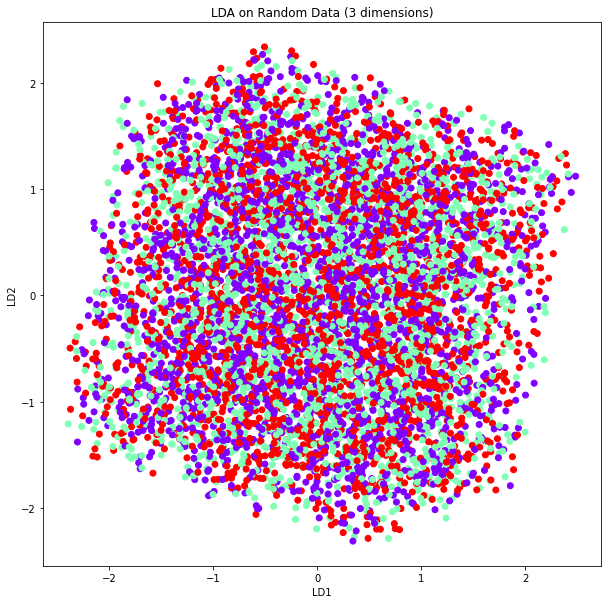

In [3]:
# Generate plots 
max_dimensions = 100
n_samples = 9000
dimensions = [i for i in range(3, max_dimensions)]

# Multithreaded
# with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
#     results = executor.map(plot_LDA, dimensions)

# Singlethreaded
# Switched back to 1 thread because they were colliding and making overlapping plots and missing plots
for n_dimensions in dimensions:
    results = plot_LDA(n_dimensions=n_dimensions, n_samples=9000)

In [ ]:
# https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python

import cv2
import os

image_folder = '.images'
video_name = 'LDA-dimensionality.avi'

images = sorted([img for img in os.listdir(image_folder) if img.endswith('.png')])
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()